In [6]:
import seaborn as sns
import pandas as pd
import numpy as np
import squarify
import matplotlib

from wordcloud import WordCloud

import matplotlib.pyplot as plt
# %matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [7]:
pd.set_option("display.max_rows", 150)

In [8]:
df = pd.read_csv('ESP_tumores_1980_2020.csv', sep = ';', encoding = 'latin1', thousands = '.')
df.head()

,Causa de muerte,Edad,Sexo,Periodo,Total
0,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2020,2399
1,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2019,2307
2,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2018,2410
3,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2017,2457
4,"009 Tumor maligno del labio, de la cavidad bu...",Todas las edades,Total,2016,2428


In [9]:
df['Causa de muerte'].nunique()

33

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Causa de muerte  1353 non-null   object
 1   Edad             1353 non-null   object
 2   Sexo             1353 non-null   object
 3   Periodo          1353 non-null   int64 
 4   Total            1353 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 53.0+ KB


In [11]:
df.drop(['Edad', 'Sexo'], axis=1, inplace=True)

In [12]:
list = []

for i in df['Causa de muerte']:
    i = i[4:]
    list.append(i)

In [13]:
df['Tipo de cancer'] = list
df.head()

,Causa de muerte,Periodo,Total,Tipo de cancer
0,"009 Tumor maligno del labio, de la cavidad bu...",2020,2399,"Tumor maligno del labio, de la cavidad bucal ..."
1,"009 Tumor maligno del labio, de la cavidad bu...",2019,2307,"Tumor maligno del labio, de la cavidad bucal ..."
2,"009 Tumor maligno del labio, de la cavidad bu...",2018,2410,"Tumor maligno del labio, de la cavidad bucal ..."
3,"009 Tumor maligno del labio, de la cavidad bu...",2017,2457,"Tumor maligno del labio, de la cavidad bucal ..."
4,"009 Tumor maligno del labio, de la cavidad bu...",2016,2428,"Tumor maligno del labio, de la cavidad bucal ..."


In [14]:
df.drop('Causa de muerte', axis = 1, inplace=True)
df.head()

,Periodo,Total,Tipo de cancer
0,2020,2399,"Tumor maligno del labio, de la cavidad bucal ..."
1,2019,2307,"Tumor maligno del labio, de la cavidad bucal ..."
2,2018,2410,"Tumor maligno del labio, de la cavidad bucal ..."
3,2017,2457,"Tumor maligno del labio, de la cavidad bucal ..."
4,2016,2428,"Tumor maligno del labio, de la cavidad bucal ..."


In [15]:
df_prostata = df[df['Tipo de cancer'] == ' Tumor maligno de la próstata']
df_mama = df[df['Tipo de cancer'] == ' Tumor maligno de la mama']
df_pancreas = df[df['Tipo de cancer'] == ' Tumor maligno del páncreas']
df_colon = df[df['Tipo de cancer'] == ' Tumor maligno del colon']
df_pulmon = df[df['Tipo de cancer'] == ' Tumor maligno de la tráquea, de los bronquios y del pulmón']

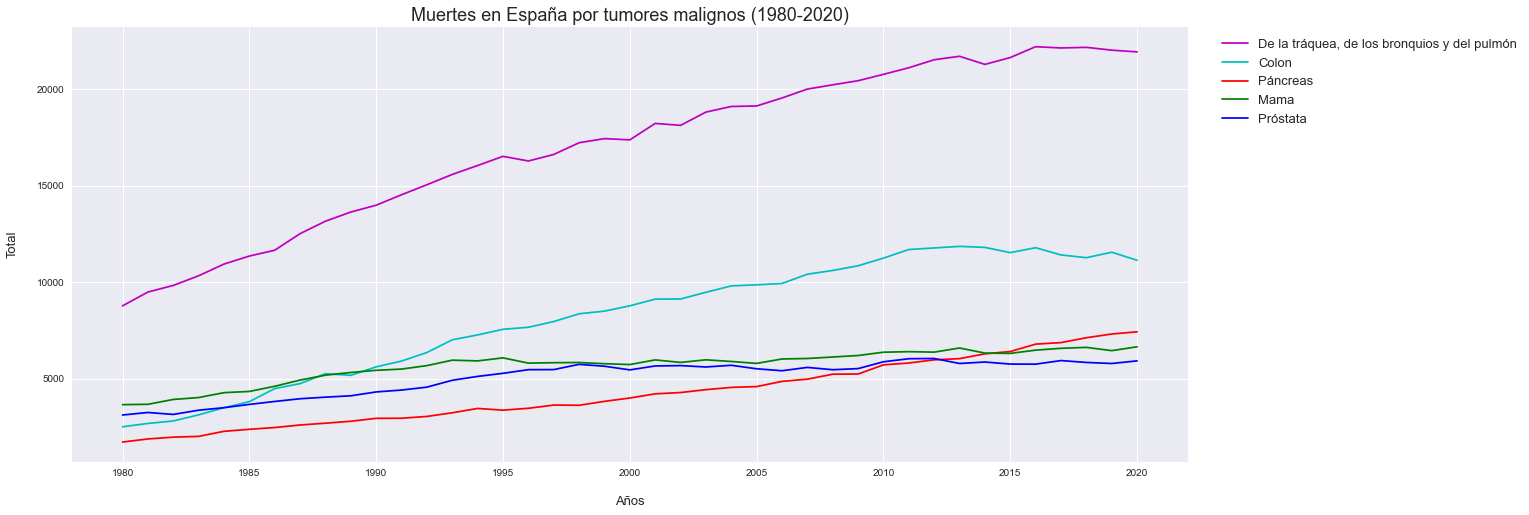

In [16]:
plt.style.use('seaborn')
plt.figure(figsize=(20,8))
plt.plot(df_pulmon['Periodo'], df_pulmon['Total'], linestyle = '-', color = 'm', label='De la tráquea, de los bronquios y del pulmón')
plt.plot(df_colon['Periodo'], df_colon['Total'], linestyle = '-', color = 'c', label='Colon')
plt.plot(df_pancreas['Periodo'], df_pancreas['Total'], linestyle = '-', color = 'r', label='Páncreas')
plt.plot(df_mama['Periodo'], df_mama['Total'], linestyle = '-', color = 'g', label='Mama')
plt.plot(df_prostata['Periodo'], df_prostata['Total'], linestyle = '-', color = 'b', label='Próstata')
plt.legend(loc='upper left', bbox_to_anchor=(1.02, 1), fontsize=13)
plt.title('Muertes en España por tumores malignos (1980-2020)', fontsize=18)
plt.xlabel('Años', size=13, labelpad=18)
plt.ylabel('Total', size=13, labelpad=18);

In [24]:
df_tum_20 = df[df['Periodo'] == 1980]
df_tum_20.sort_values('Total', inplace=True, ascending=False)
df_tum_20.head()

,Periodo,Total,Tipo de cancer
409,1980,8771,"Tumor maligno de la tráquea, de los bronquios..."
122,1980,7612,Tumor maligno del estómago
1106,1980,4571,"Tumor maligno de sitios mal definidos, secund..."
245,1980,4196,Tumor maligno del hígado y vías biliares intr...
614,1980,3656,Tumor maligno de la mama


In [23]:
df_tum_20 = df[df['Periodo'] == 2020]
df_tum_20.sort_values('Total', inplace=True, ascending=False)
df_tum_20.head()

,Periodo,Total,Tipo de cancer
369,2020,21918,"Tumor maligno de la tráquea, de los bronquios..."
123,2020,11131,Tumor maligno del colon
246,2020,7427,Tumor maligno del páncreas
574,2020,6651,Tumor maligno de la mama
779,2020,5922,Tumor maligno de la próstata


In [18]:
df_tum_20.tail(10)

,Periodo,Total,Tipo de cancer
902,2020,4423,Tumor maligno de la vejiga
1066,2020,4734,"Tumor maligno de sitios mal definidos, secund..."
82,2020,4917,Tumor maligno del estómago
1107,2020,5011,"Tumores malignos del tejido linfático, de los..."
205,2020,5021,Tumor maligno del hígado y vías biliares intr...
779,2020,5922,Tumor maligno de la próstata
574,2020,6651,Tumor maligno de la mama
246,2020,7427,Tumor maligno del páncreas
123,2020,11131,Tumor maligno del colon
369,2020,21918,"Tumor maligno de la tráquea, de los bronquios..."


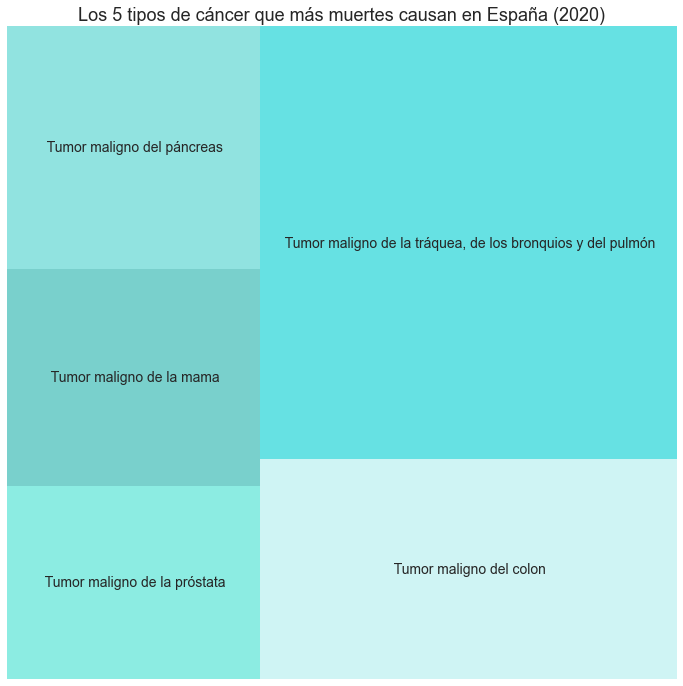

In [19]:
plt.figure(figsize=(12,12))
colors=['turquoise', 'lightseagreen', 'mediumturquoise', 'paleturquoise', 'darkturquoise']
squarify.plot(sizes=df_tum_20['Total'].iloc[28:], alpha=.6, label=df_tum_20['Tipo de cancer'].iloc[28:], color=colors, text_kwargs={'fontsize':14})
plt.title('Los 5 tipos de cáncer que más muertes causan en España (2020)', size=18, )
plt.axis('off');

In [26]:
df_tum_20['Tipo de cancer'].unique()

array([' Tumor maligno de la tráquea, de los bronquios y del pulmón',
       ' Tumor maligno del estómago',
       ' Tumor maligno de sitios mal definidos, secundarios y de sitios no especificados',
       ' Tumor maligno del hígado y vías biliares intrahepáticas',
       ' Tumor maligno de la mama', ' Tumor maligno de la próstata',
       ' Otros tumores malignos digestivos', ' Tumor maligno del colon',
       ' Tumor maligno de la vejiga',
       ' Tumor maligno del recto, de la porción rectosigmoide y del ano',
       ' Tumor maligno del encéfalo', ' Tumor maligno de la laringe',
       ' Leucemia', ' Tumor maligno del páncreas',
       ' Tumor maligno de otras partes del útero',
       ' Tumores malignos del tejido linfático, de los órganos hematopoyéticos y de tejidos afines, excepto leucemia',
       ' Tumor maligno del esófago',
       ' Tumor maligno del labio, de la cavidad bucal y de la faringe',
       ' Tumores malignos del hueso y de los cartílagos articulares',
       ' T

In [20]:
text = " ".join(tipo for tipo in df_tum_20['Tipo de cancer'])

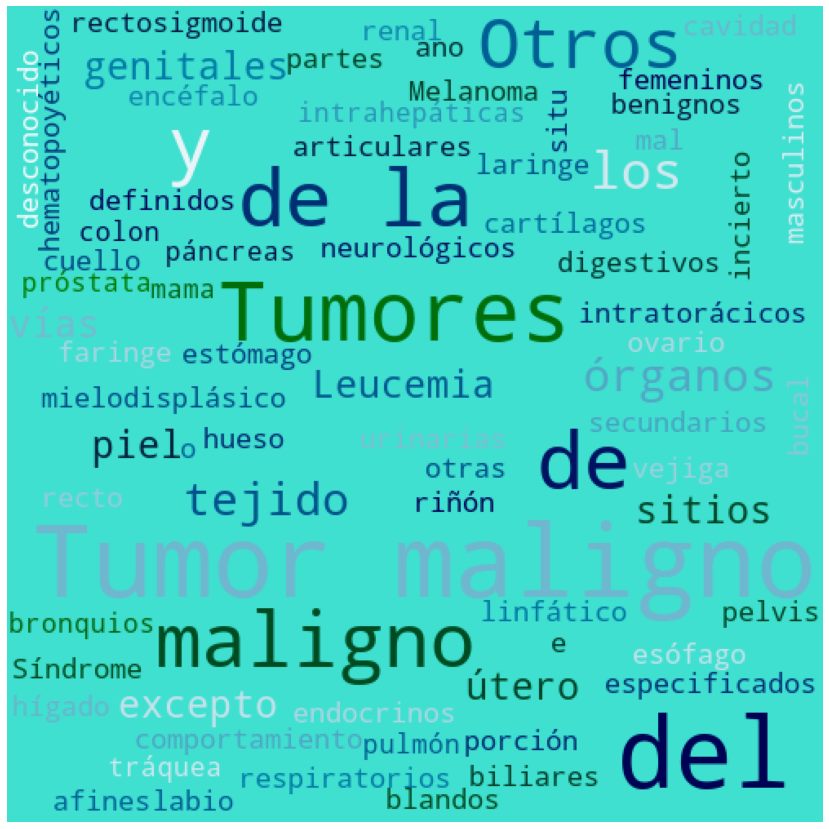

In [21]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(15, 15))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 500, height = 500, background_color='#40E0D0', colormap="ocean",  random_state=10).generate(text)
plot_cloud(wordcloud)

In [22]:
# plt.figure(figsize=(15,15))

# word_cloud = WordCloud(width = 500, height = 500, collocations = False, background_color = 'white',  random_state=10).generate(text)

# plt.imshow(word_cloud, interpolation='bilinear')
# plt.axis("off")
# plt.show()